# Análise Descritiva Univariada

---



- Baixe a base "Cotações" no link: [Clique aqui para baixar o arquivo](https://drive.google.com/file/d/1STghp6kbArdvOeLUNa-exQRkfxJEYRqh/view?usp=drive_link)




In [ ]:
import pandas as pd #manipulação de dados em formato de dataframe
import numpy as np #biblioteca para operações matemáticas multidimensionais
import seaborn as sns #biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt #biblioteca de visualização de dados
from scipy import stats
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Caminho do diretório escolhido
path = "/content/drive/MyDrive/DataScience"

Mounted at /content/drive


In [ ]:
# Leitura do arquivo
df_pessoas = pd.read_csv(path + '/pessoas.csv', sep=',')

df_pessoas = df_pessoas.dropna()

# Mostrando as 10 primeiras linhas
df_pessoas.head(10)

,regiao,idade,renda,estado_civil,educacao,tempo_emprego,situacao_aposentadoria,genero,codigo_residencia,altura
0,Rio de Janeiro,44,64,1,Mestrado,5,0,0,Casa,1.69
1,Goiás,33,136,1,Doutorado,5,0,0,Chalé,1.98
2,Goiás,52,116,1,Fundamental,29,0,1,Casa,1.87
3,Rio de Janeiro,33,33,0,Medio,0,0,1,Apartamento,1.80
4,Rio de Janeiro,30,30,1,Fundamental,2,0,0,Sítio,1.58
5,Rio de Janeiro,39,78,0,Medio,16,0,1,Apartamento,1.58
6,Goiás,22,19,1,Medio,4,0,1,Fazenda,1.53
7,Rio de Janeiro,35,76,0,Medio,10,0,0,Condomínio,1.93
8,Goiás,59,166,1,Mestrado,31,0,0,Fazenda,1.80
9,São Paulo,41,72,1,Fundamental,22,0,0,Condomínio,1.85


In [ ]:
# Tabela de frequências absolutas (contagem) e relativas (%) da variável 'preco'
contagem = df_pessoas['renda'].value_counts()
percent = df_pessoas['renda'].value_counts(normalize=True)
pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=True)

# Estatísticas descritivas univariadas da variável 'preco'
df_pessoas['renda'].describe()

,renda
count,1000.000000
mean,77.535000
std,107.044165
min,9.000000
25%,29.000000
50%,47.000000
75%,83.000000
max,1668.000000


# Moda, Média e Mediana

In [ ]:
moda = stats.mode(df_pessoas['renda'])

print(f"A moda é: {moda}")

media = df_pessoas['renda'].mean()

print(f"A média é: {media}")

mediana = df_pessoas['renda'].median()

print(f"A mediana é: {mediana}")

A moda é: ModeResult(mode=25, count=24)
A média é: 77.535
A mediana é: 47.0


# 01 - Exercício: Calcule a média, mediana e moda para o atributo "idade".

In [ ]:
# Resposta Exercício 01

# Tabela de Frequência

In [ ]:
# Definir o número de classes e gerar o histograma
num_classes = 6
dados = df_pessoas['renda']
frequencia, limites_classes = np.histogram(dados, bins=num_classes)

# Frequência Relativa (usando SciPy)
frequencia_relativa = stats.relfreq(dados, numbins=num_classes)

# Ponto Médio de cada classe
pontos_medios = (limites_classes[:-1] + limites_classes[1:]) / 2

# Frequência Acumulada
frequencia_acumulada = np.cumsum(frequencia)

# Criando uma tabela organizada
import pandas as pd
tabela_final = pd.DataFrame({
    'Limite Inferior': limites_classes[:-1],
    'Limite Superior': limites_classes[1:],
    'Frequência': frequencia,
    'Frequência Relativa': frequencia_relativa.frequency,
    'Frequência Acumulada': frequencia_acumulada,
    'Ponto Médio': pontos_medios
})

print(tabela_final)


   Limite Inferior  Limite Superior  Frequência  Frequência Relativa  \
0              9.0            285.5         967                0.918   
1            285.5            562.0          24                0.072   
2            562.0            838.5           5                0.006   
3            838.5           1115.0           2                0.003   
4           1115.0           1391.5           1                0.000   
5           1391.5           1668.0           1                0.001   

   Frequência Acumulada  Ponto Médio  
0                   967       147.25  
1                   991       423.75  
2                   996       700.25  
3                   998       976.75  
4                   999      1253.25  
5                  1000      1529.75  


# 02 - Exercício: Criação de Tabela de Frequência Acumulada e Ponto Médio das Classes

## Descrição

Neste exercício, você deverá criar uma tabela de frequência acumulada e calcular o ponto médio de cada classe, utilizando as bibliotecas **NumPy**, **SciPy** e **Pandas** para o atibuto **"tempo_de_emprego"**.


In [ ]:
# Resposta Exercício 02

#Histograma e Gráfico de Dispersão

- Sobre a biblioteca: [MATPLOTLIB](https://matplotlib.org/stable/gallery/index)



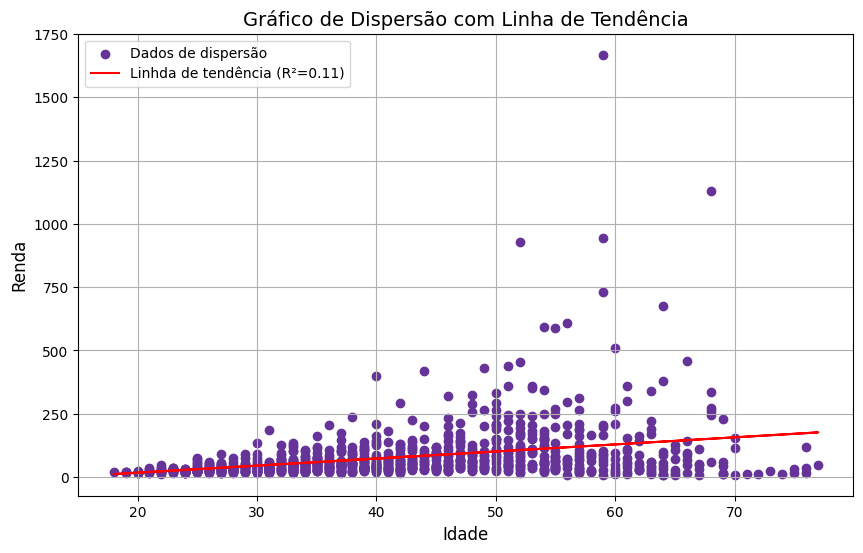

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_pessoas['idade'], df_pessoas['renda'])

# Linha de tendência
trendline = slope * df_pessoas['idade'] + intercept

# Plotando os dados
plt.figure(figsize=(10,6))
plt.scatter(df_pessoas['idade'],  df_pessoas['renda'], label='Dados de dispersão', color='blue')
plt.plot(df_pessoas['idade'], trendline, label=f'Linhda de tendência (R²={r_value**2:.2f})', color='red')

# Títulos e legendas
plt.title('Gráfico de Dispersão com Linha de Tendência', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Renda', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

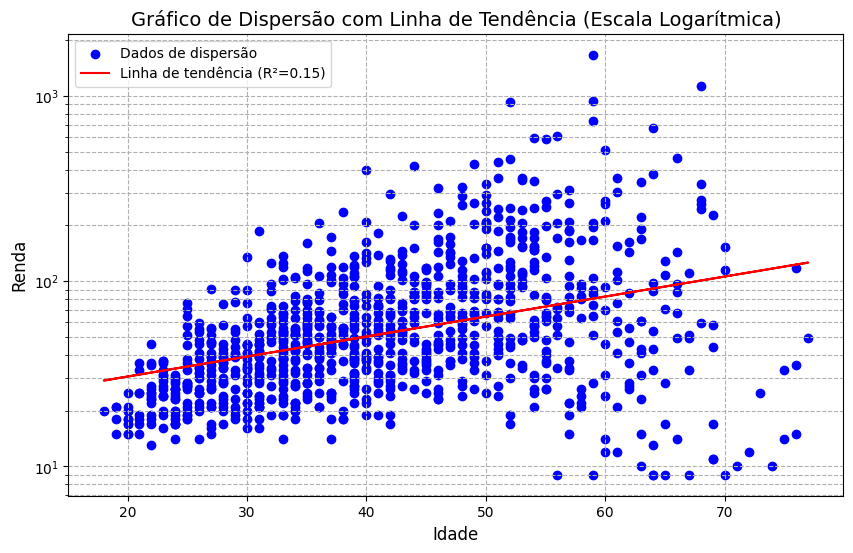

In [ ]:
# Ajuste de linha de tendência (regressão linear)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_pessoas['idade'], np.log(df_pessoas['renda']))

# Linha de tendência
trendline = np.exp(slope * df_pessoas['idade'] + intercept)

# Plotando os dados
plt.figure(figsize=(10,6))
plt.scatter(df_pessoas['idade'],df_pessoas['renda'], label='Dados de dispersão', color='blue')
plt.plot(df_pessoas['idade'], trendline, label=f'Linha de tendência (R²={r_value**2:.2f})', color='red')

# Ajustar o eixo y para escala logarítmica
plt.yscale('log')

# Títulos e legendas
plt.title('Gráfico de Dispersão com Linha de Tendência (Escala Logarítmica)', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Renda', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

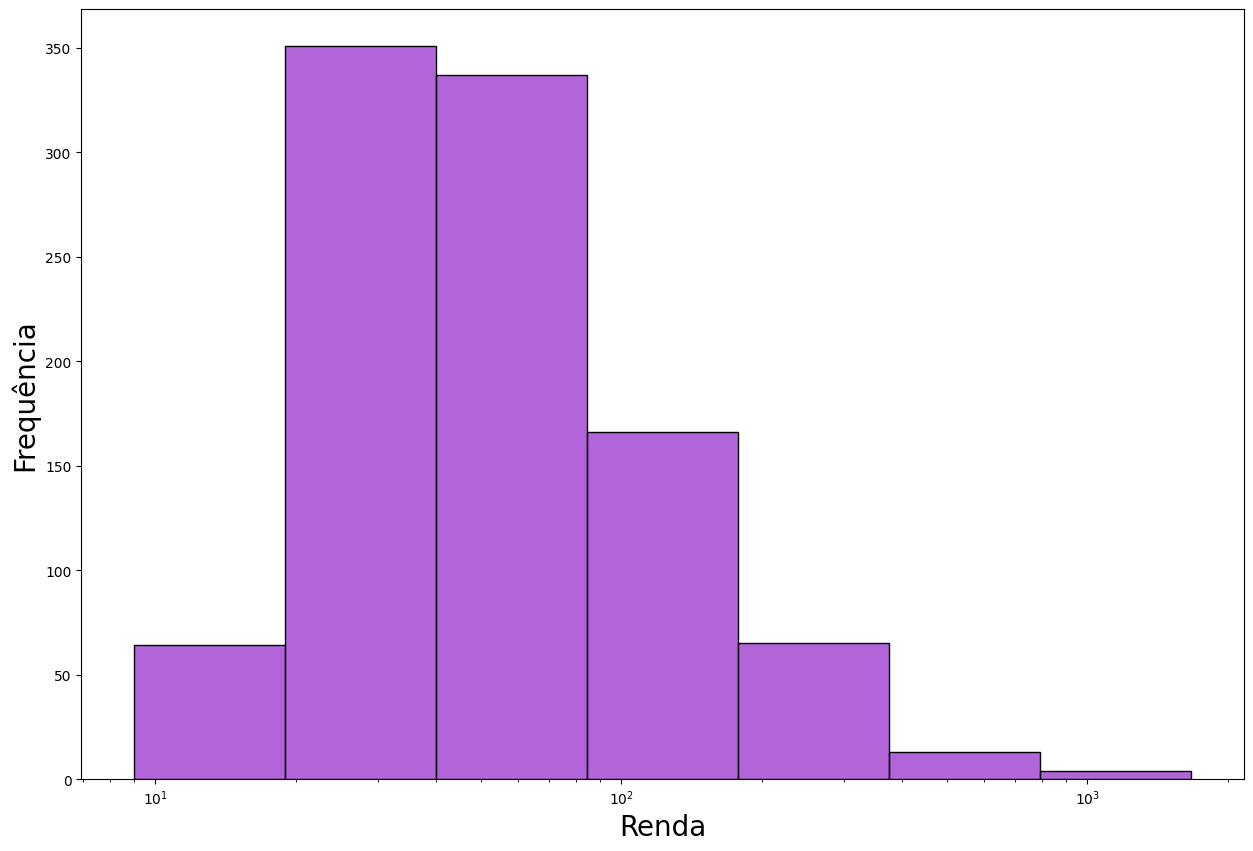

In [ ]:
# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=df_pessoas, x='renda',log_scale=True, bins=7, color='darkorchid')
plt.xlabel('Renda', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.show()

# 03 - Exercício: Crie um gráfico de dispersão com linha de tendência para Idade X Altura

In [ ]:
# Resposta Exercício 03

# 04 - Exercício: Crie um gráfico histograma Idade

In [ ]:
# Resposta Exercício 04

#Gráfico de Barras

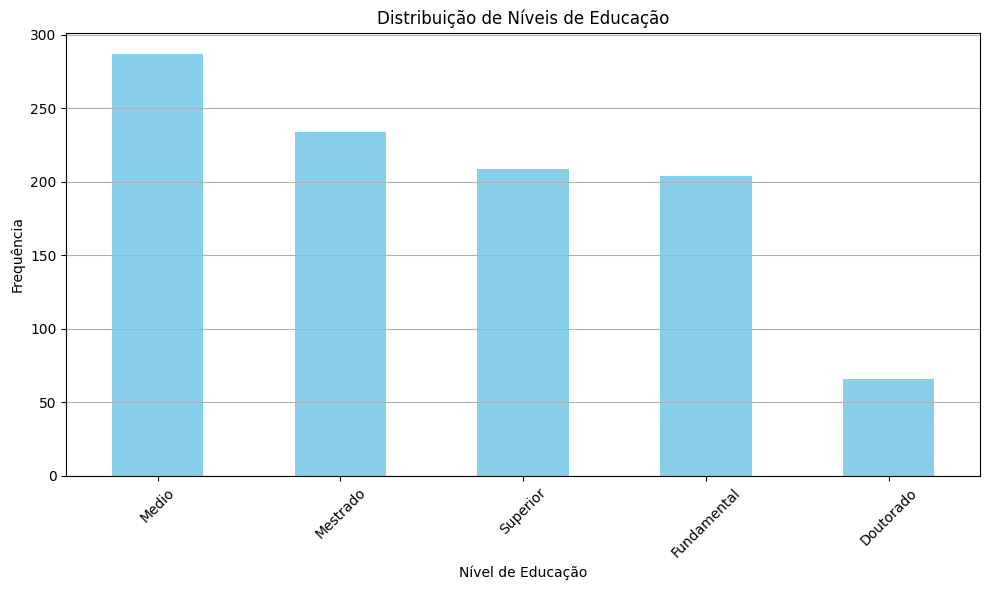

In [ ]:
# Contar a frequência de cada nível de educação
frequencia_educacao = df_pessoas['educacao'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_educacao.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Níveis de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

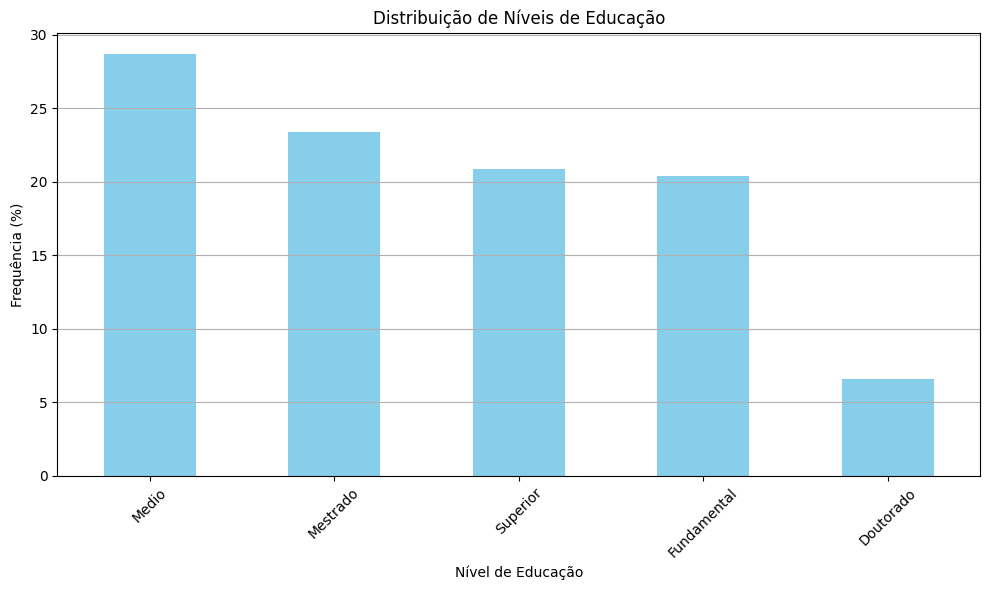

In [ ]:
# Contar a frequência de cada nível de educação
frequencia_educacao = df_pessoas['educacao'].value_counts(normalize = True)*100

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_educacao.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Níveis de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Frequência (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# 05 - Exercício: Crie dois graficos de barras (frequência e frequência relativa) referente a variável **"codigo_residencia"**

In [ ]:
# Resposta Exercício 05

# Gráfico de Setores (pizza)

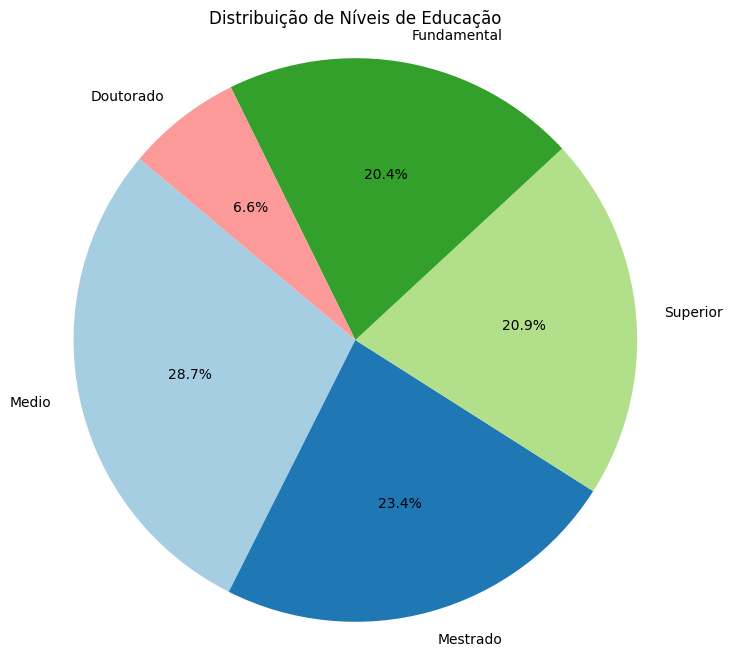

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_educacao, labels=frequencia_educacao.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Níveis de Educação')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo

# Exibir o gráfico
plt.show()

# 06 - Exercício: Crie um gráfico de setores referente a variável **"codigo_residencia"**

In [ ]:
# Resposta Exercício 06

# Boxplot

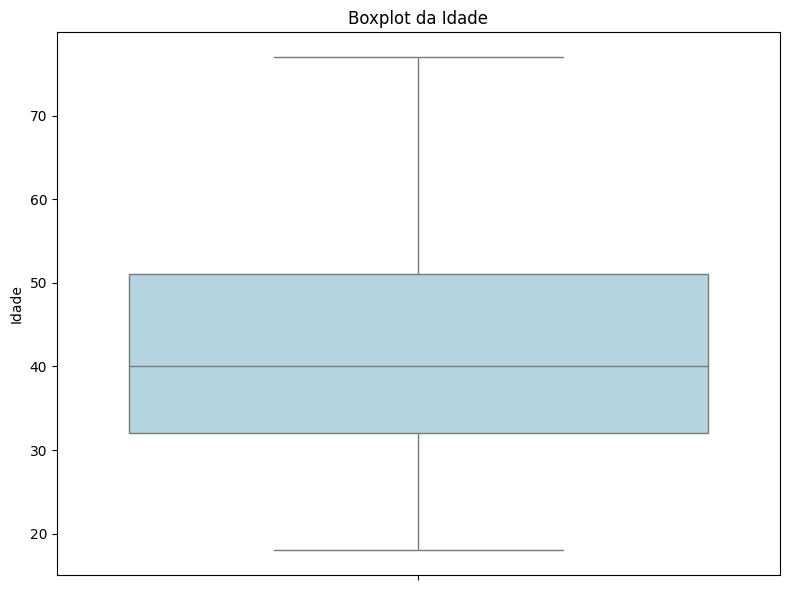

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='idade', data=df_pessoas, color='lightblue')
plt.title('Boxplot da Idade')
plt.ylabel('Idade')

# Exibir o gráfico
plt.tight_layout()
plt.show()

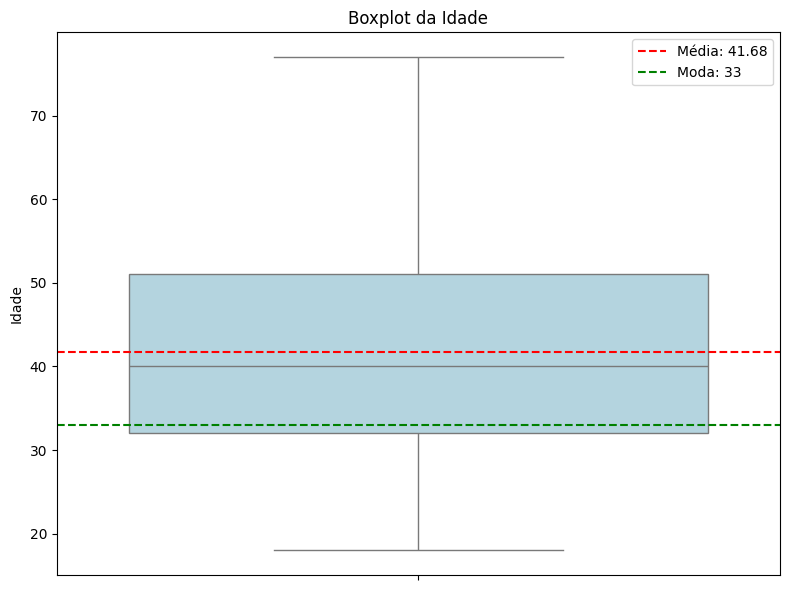

In [ ]:
# Calcular a média e a moda da idade
media_idade = df_pessoas['idade'].mean()
moda_idade = df_pessoas['idade'].mode()[0]  # Pega a primeira moda

# Criar um boxplot da idade
plt.figure(figsize=(8, 6))
sns.boxplot(y='idade', data=df_pessoas, color='lightblue')

# Adicionar linha tracejada da média
plt.axhline(media_idade, color='red', linestyle='--', label=f'Média: {media_idade:.2f}')
# Adicionar linha tracejada da moda
plt.axhline(moda_idade, color='green', linestyle='--', label=f'Moda: {moda_idade}')

plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# 07 - Exercício: Crie um boxplot para a variável **"renda"**

In [ ]:
# Resposta Exercício 07